(0.0, 0.3)

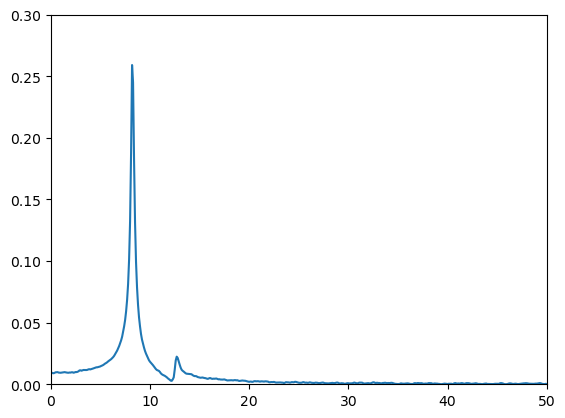

In [17]:
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

fmax = 50e9          
T    = 10e-9        
dt   = 1.00e-11

table = np.loadtxt("dynamic/log.txt", skiprows=1)

dmx     = table[:,2] - table[:,2][0]  
dmy     = table[:,3] - table[:,3][0]  
dmz     = table[:,4] - table[:,4][0]  

mx_fft = np.abs(np.fft.fft(dmx))
my_fft = np.abs(np.fft.fft(dmy))
mz_fft = np.abs(np.fft.fft(dmz))

freq   = np.linspace(0, 1/dt, len(dmy)) 

plt.plot(freq/1e9, my_fft)
plt.xlim(0,50)
plt.ylim(0,0.3)

In [38]:
find_peaks(my_fft,height=0.02)[0]

array([ 82, 127, 874, 919])

In [26]:
print("Frequency first peak (GHz)", freq[82]/1e9)
print("Frequency first peak (GHz)", freq[127]/1e9)

Frequency first peak (GHz) 8.2
Frequency first peak (GHz) 12.7


(0.0, 800.0)

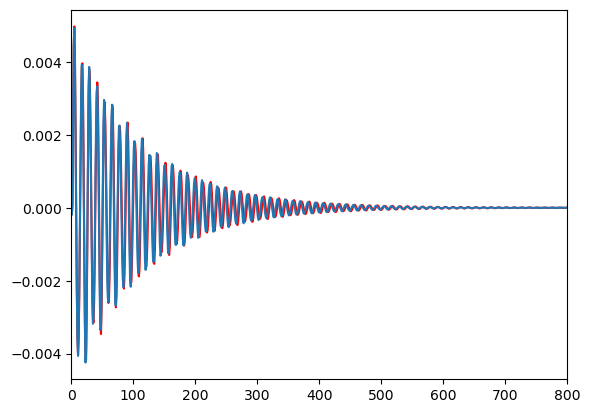

In [34]:
# We can compare con mumax3 using the same parameters

fmaxmx3 = 50e9        
Tmx3    = 10e-9        
dtmx3   = 1e-11

tablemx3 = np.loadtxt("table.txt") #mumax3 simulations considering the same geometry and discretization of 1x1x1 nm^3
dmxmx3     = tablemx3[:,1] - tablemx3[:,1][0]  
dmymx3     = tablemx3[:,2] - tablemx3[:,2][0]  
dmzmx3     = tablemx3[:,3] - tablemx3[:,3][0]  

plt.plot(dmymx3, color ='r')
plt.plot(dmy )
plt.xlim(0,800)

In [27]:
mx_fftmx3 = np.abs(np.fft.fft(dmxmx3))
my_fftmx3 = np.abs(np.fft.fft(dmymx3))
mz_fftmx3 = np.abs(np.fft.fft(dmzmx3))
freqmx3   = np.linspace(0, 1/dtmx3, len(dmzmx3)) 
find_peaks(my_fftmx3,height=0.01)[0]

array([ 82, 127, 874, 919])

In [28]:
print("Frequency first peak (GHz)", freqmx3[82]/1e9)
print("Frequency first peak (GHz)", freqmx3[127]/1e9)

Frequency first peak (GHz) 8.2
Frequency first peak (GHz) 12.7
